<a href="https://colab.research.google.com/github/Prakashlpk/Cricsheet-Match-Data-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df1=pd.read_csv("/content/IPL_data.csv")

In [ ]:
import plotly.express as px
import pandas as pd

df_new = df1.groupby("team", as_index=False)["total_runs"].sum()

fig = px.bar(df_new, x="team", y="total_runs", title="Team vs Total Runs in IPL 2024")

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

df_new = df1.groupby("bowler", as_index=False)["wickets"].sum()

fig = px.bar(df_new, x="bowler", y="wickets", title="Bowler vs Wickets in IPL 2024")

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

df_new = df1.groupby("batter", as_index=False)["batter_runs"].sum()

fig = px.bar(df_new, x="batter", y="batter_runs", title="Batter vs batter_runs in IPL 2024")

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

df_csk = df1[df1["team"] == "Chennai Super Kings"]
df_csk_line = df_csk.groupby(["match_number", "batter"], as_index=False)["batter_runs"].sum()

fig = px.line(df_csk_line, x="match_number", y="batter_runs", color="batter",
              title="CSK Batter Runs Progression Over Matches in IPL 2024",
              markers=True)

fig.show()


In [ ]:
df2=pd.read_csv("/content/ODI_data_new.csv")

In [ ]:
team_wins = df2["result"].value_counts()
total_matches = df2["team"].value_counts()
win_percentage = (team_wins / total_matches) * 100
fig_win_percentage = px.pie(names=win_percentage.index, values=win_percentage,
                            title="Winning Percentage of Teams in ICC Cricket World Cup 2023")
fig_win_percentage.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df2, x="batter", y="dismissal_kind",
                 color="dismissal_kind",
                 title="Players and Their Dismissal Kind in ICC Cricket World Cup",
                 labels={"batter": "Player", "dismissal_kind": "Dismissal Type"})
fig.show()


In [ ]:
df3=pd.read_csv("/content/Test_data.csv")

In [ ]:
import plotly.graph_objects as go

bowler_stats = df1.groupby("bowler")[["wickets", "balls_bowled"]].sum().reset_index()
bowler_stats["overs_bowled"] = (bowler_stats["balls_bowled"] // 6)

fig = go.Figure(data=[go.Scatter3d(
    x=bowler_stats["bowler"],
    y=bowler_stats["wickets"],
    z=bowler_stats["overs_bowled"],
    mode='markers',
    marker=dict(size=10, color=bowler_stats["wickets"], colorscale="Viridis")
)])

fig.update_layout(
    title="3D Scatter Plot of Wickets and Overs Bowled by Bowlers in India vs Australia Test Series",
    scene=dict(
        xaxis_title='Bowler',
        yaxis_title='Wickets',
        zaxis_title='Overs Bowled'
    )
)

fig.show()


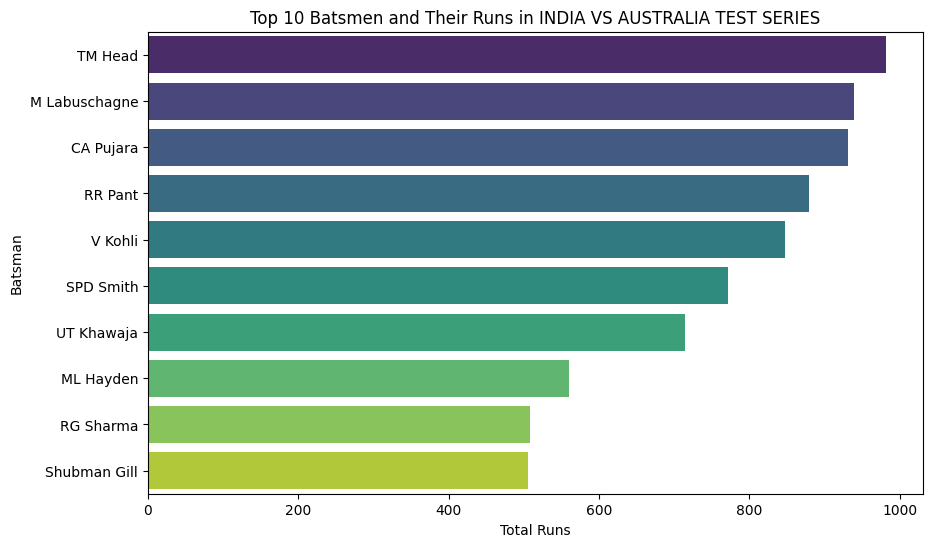

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_batsmen = df3.groupby("batter")["batter_runs"].sum().reset_index()
top_batsmen = top_batsmen.sort_values("batter_runs", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="batter_runs", y="batter", data=top_batsmen, hue="batter", palette="viridis", legend=False)

plt.title("Top 10 Batsmen and Their Runs in INDIA VS AUSTRALIA TEST SERIES")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()


In [ ]:
df4=pd.read_csv("/content/T20_data.csv")

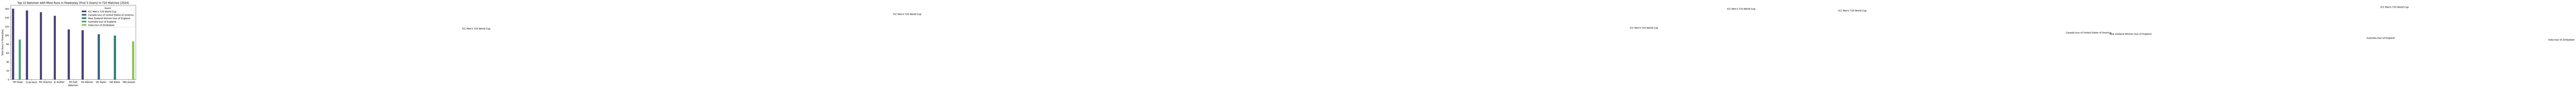

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df4["season"] = df4["season"].astype(str)

t20_2024_data = df4[(df4["match_type"] == "T20") & (df4["season"].str.startswith("2024"))]
powerplay_data = t20_2024_data[t20_2024_data["over"] <= 5]

powerplay_runs = powerplay_data.groupby(["batter", "event"])["batter_runs"].sum().reset_index()

top_powerplay_batsmen = powerplay_runs.sort_values("batter_runs", ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="batter", y="batter_runs", data=top_powerplay_batsmen, hue="event", palette="viridis")

plt.title("Top 10 Batsmen with Most Runs in Powerplay (First 5 Overs) in T20 Matches (2024)")
plt.xlabel("Batsman")
plt.ylabel("Total Runs in Powerplay")

for i, row in top_powerplay_batsmen.iterrows():
    ax.text(i, row["batter_runs"] + 1, row["event"], ha='center', va='bottom', fontsize=10)

plt.legend(title="Event", loc="upper right")
plt.show()


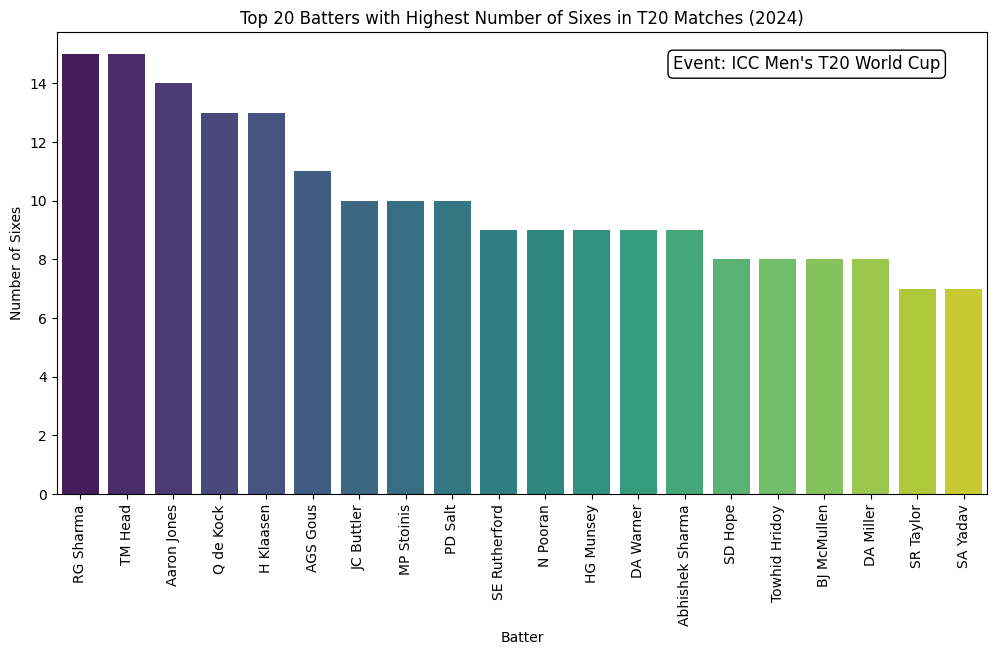

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df4["season"] = df4["season"].astype(str)
t20_data = df4[(df4["match_type"] == "T20") & (df4["season"].str.startswith("2024"))]
batter_sixes = t20_data[t20_data["batter_runs"] == 6].groupby(["batter", "event"])["batter_runs"].count().reset_index()
batter_sixes_sorted = batter_sixes.sort_values("batter_runs", ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x="batter", y="batter_runs", data=batter_sixes_sorted, hue="batter", palette="viridis", legend=False)

plt.title("Top 20 Batters with Highest Number of Sixes in T20 Matches (2024)")
plt.xlabel("Batter")
plt.ylabel("Number of Sixes")
plt.xticks(rotation=90)

event_name = batter_sixes_sorted["event"].iloc[0] if not batter_sixes_sorted.empty else "No Event"
plt.text(0.95, 0.95, f'Event: {event_name}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.show()
